In [109]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy import signal
from scipy.io.wavfile import write
from scipy.io.wavfile import read
import IPython

800 samples!


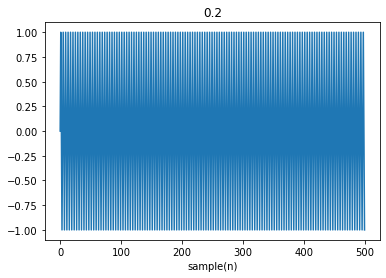

In [110]:
import matplotlib.pyplot as plt
import numpy as np

#pulse duration = samples/Fs, duration*Fs = samples
duration = .2
Fs = 4000
f = 1000
sample = round(duration*Fs)
print(str(sample) + ' samples!')

x = np.arange(sample)
y = np.sin(2 * np.pi * f * x / Fs)
plt.plot(x[:500], y[:500])
plt.xlabel('sample(n)')
plt.title(sample/Fs)
plt.show()

In [111]:
write('OOK.wav', Fs, y.astype(np.float32))
IPython.display.Audio('OOK.wav')

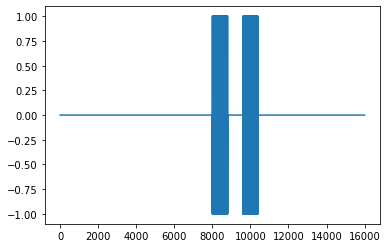

In [170]:
#put 4 symbols together, transmit (1 0 1)
out = np.zeros(20*sample)
out[10*sample:11*sample] = y
out[12*sample:13*sample] = y

plt.plot(out)

In [171]:
write('OOKseq.wav', Fs, out.astype(np.float32))
IPython.display.Audio('OOKseq.wav')

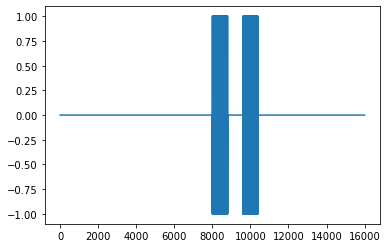

In [172]:
file = 'OOKseq'
samplerate, x = read(file+'.wav')
plt.plot(x)
IPython.display.Audio(file+'.wav')

In [166]:
#now we need to decode the sequence
#sweep a window over the entire sequence to get all the information
sampleIndex = []
dataIndex = []
step = round(sample)
for i in range(0, len(x), step):
    sampleIndex.append(i + sample/2)

In [167]:
#extract the sequence
for i in range(0, len(sampleIndex)):
    index = int(sampleIndex[i])
    if index > len(x):
        break
    if np.abs(x[index]) >0:#> 20000:
        dataIndex.append(1)
    else:
        dataIndex.append(0)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]


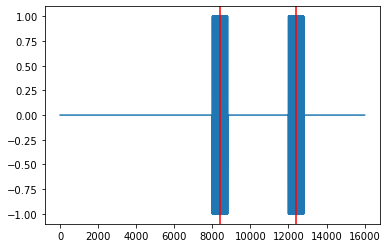

In [168]:
#display the results
for i in range(len(dataIndex)):
    if dataIndex[i] == 1 or dataIndex == 0:
        plt.axvline(sampleIndex[i], color = 'red', zorder = 1)
    #else:
        #plt.axvline(sampleIndex[i], color = 'green', zorder = 1)
plt.plot(x, zorder = 0)
print(dataIndex)

In [169]:
#idea: we need to synchronize the clock somehow, perhaps have some sort of sync code and then read the message after

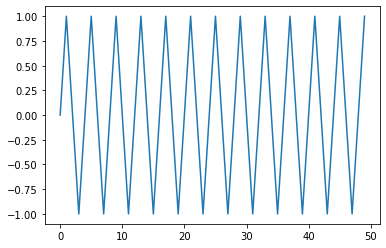

In [178]:
plt.plot(x[8000:8050])